In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
IceCream = pd.read_csv("./IceCreamData.csv")

In [3]:
# Data overview
print(IceCream.head())
print(IceCream.isnull().sum())
print(IceCream.describe())
print(IceCream.info())

   Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194
Temperature    0
Revenue        0
dtype: int64
       Temperature      Revenue
count   500.000000   500.000000
mean     22.232225   521.570777
std       8.096388   175.404751
min       0.000000    10.000000
25%      17.122258   405.558681
50%      22.392791   529.368565
75%      27.740674   642.257922
max      45.000000  1000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None


In [4]:
# Features and target
X = IceCream[['Temperature']]
y = IceCream['Revenue']


In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# Train the model
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Model coefficients
print('Linear Model Coefficient (m):', regressor.coef_)
print('Linear Model Intercept (b):', regressor.intercept_)

Linear Model Coefficient (m): [21.37416109]
Linear Model Intercept (b): 46.910784750530524


In [8]:
# Predictions
y_predict = regressor.predict(X_test)

In [9]:
# Model evaluation metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 618.17
Mean Absolute Error: 19.12
R-squared: 0.98


In [10]:
# Save and reload the model
joblib.dump(regressor, 'linear_regression_model.pkl')
loaded_regressor = joblib.load('linear_regression_model.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [11]:
# Example prediction
temperature_array = [[24.566884]]
predicted_revenue = loaded_regressor.predict(temperature_array)
print(f"Predicted Revenue: {predicted_revenue[0]}")

Predicted Revenue: 572.0073208402505


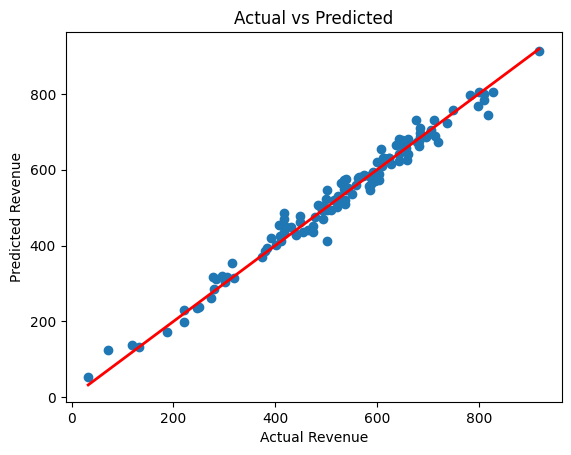

In [12]:
# Visualization: Actual vs Predicted
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.show()

In [13]:
# Training and testing R-squared
train_r2 = regressor.score(X_train, y_train)
test_r2 = regressor.score(X_test, y_test)
print(f"Training R-squared: {train_r2:.2f}")
print(f"Testing R-squared: {test_r2:.2f}")

Training R-squared: 0.98
Testing R-squared: 0.98


In [14]:
# Cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {cv_scores.mean():.2f}")

Cross-validated R-squared: 0.98


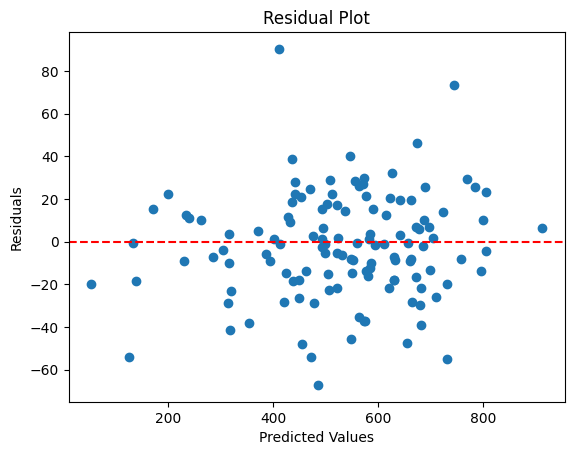

In [15]:
# Residual plot
residuals = y_test - y_predict
plt.scatter(y_predict, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()